# Exploratory Data Analysis: Twitter Data

In [8]:
import pandas as pd
import numpy as np 
from pandas.io import gbq
import matplotlib.pyplot as plt

First, we are going to load the data from BigQuery that includes tweets from 2020-01-02 up to 2021-10-31. These tweets are only from verified accounts and are the most popular each day. The dataset has more than 300,000 tweets. 

In [4]:
tweets = """SELECT * FROM `dpa-2022-itam.prueba_twits.historical_tweets`"""
tweets_data = gbq.read_gbq(tweets, project_id = "dpa-2022-itam")
tweets_data.head(10)

,likes,author_id,author_tweets,retweets,created_at,text,author_location,quote_count,username,replies,author_followers,author_description,id
0,60,2680350607,168954,5,2020-01-02 00:02:59+00:00,What is Bitcoin currently being used for? It’s...,"Detroit, MI",2,haydentiff,15,74460,"“The beginning of a revolution is, in reality,...",1212524652079267841
1,22,61417559,23715,6,2020-01-02 00:06:01+00:00,“ShapeShift’s 2019 Highlights” by @ShapeShift_...,Bitcoinland,0,ErikVoorhees,2,588046,"Toward peace, markets, and Bitcoin. Founder of...",1212525414804934662
2,0,762522504,216751,0,2020-01-02 00:05:28+00:00,@icomputer7 @joeltelling @RemadeGamer @3DArtil...,"Seattle, WA",0,Barnacules,0,115249,Former Microsoft Senior SDET that worked on Wi...,1212525277047226371
3,2,714731566828793857,284816,0,2020-01-02 00:48:59+00:00,Kim Jong Un has once again lived up to his unp...,"Mumbai, India",0,bloombergquint,0,278570,#India’s premier multi-platform #business and ...,1212536228844732417
4,1,562967099,134866,2,2020-01-02 00:45:04+00:00,2010s In #Bitcoin: The Year 2019 via @forbes \...,"Las Vegas, NV",0,RAlexJimenez,0,16322,"#FinServ Consultant @EPAMSYSTEMS | Strategist,...",1212535243003105291
5,0,27368568,3959,0,2020-01-02 01:23:40+00:00,@strassa bitcoin billionaires,"Miami, FL",0,badams78,0,24549,Apple podcast: https://t.co/ZkbjFh051O\ninsta:...,1212544957245845505
6,1,2680350607,168954,0,2020-01-02 01:27:23+00:00,"@diamond_crypto Right. So back to my OP, is Bi...","Detroit, MI",0,haydentiff,0,74460,"“The beginning of a revolution is, in reality,...",1212545892961705985
7,19,2680350607,168954,2,2020-01-02 01:47:14+00:00,"Anonymous message sent to me:\n“Fun fact, avg ...","Detroit, MI",1,haydentiff,2,74460,"“The beginning of a revolution is, in reality,...",1212550887324995584
8,9,2680350607,168954,3,2020-01-02 02:14:51+00:00,@james_lackland People conditioned to associat...,"Detroit, MI",0,haydentiff,1,74460,"“The beginning of a revolution is, in reality,...",1212557837999718400
9,2277,2438831503,22224,1701,2020-01-02 15:02:43+00:00,"Paul Pelosi Jr.'s Russia Ties, charges of taki...","Washington, DC ��������",251,ChanelRion,156,433486,@OANN Chief White House Correspondent | https:...,1212751077474492416


In [5]:
tweets_data.describe()

,likes,author_id,author_tweets,retweets,quote_count,replies,author_followers,id
count,308250.000000,3.082500e+05,3.082500e+05,308250.000000,308250.000000,308250.000000,3.082500e+05,3.082500e+05
mean,214.788753,-2.143768e+12,1.038665e+05,35.526462,6.499624,23.187530,8.997225e+05,1.631944e+13
std,2644.146955,3.158744e+17,1.892631e+05,1455.349244,406.966842,620.315783,2.902419e+06,5.915406e+16
min,0.000000,1.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,1.700000e+01,1.212525e+18
25%,1.000000,2.040294e+07,1.483900e+04,0.000000,0.000000,0.000000,3.253100e+04,1.339505e+18
50%,9.000000,1.518056e+08,4.035100e+04,2.000000,0.000000,1.000000,1.109010e+05,1.374832e+18
75%,56.000000,1.598709e+09,1.030370e+05,10.000000,1.000000,6.000000,6.108000e+05,1.410265e+18
max,864408.000000,1.438731e+18,8.155349e+06,777852.000000,181047.000000,175028.000000,7.763731e+07,1.454961e+18


In [7]:
tweets_data['username'].nunique()

21766

In this dataset, we have more than 21,000 unique users. There is also a tweet that reached almost a million retweets, while the mean is 35 retweets and the median is only 2. The difference between the mean and the median of retweets is significant as there is a standard deviation of 1455 tweets. As it is shown the 75 percentile is 10 retweets so we can expect to have some outliers. The same happens to likes, quote count, and replies, it appears that some tweets have more impact on Twitter than others. 

This can be explained as the mean number of followers of the users is 32,531, while the max gets over 70 million. 

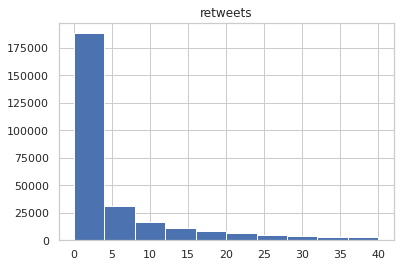

In [38]:
hist_retweets = tweets_data.query('retweets < retweets.quantile(.9)').hist(column=['retweets'])

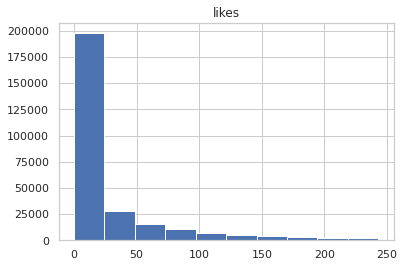

In [37]:
hist_likes = tweets_data.query('likes < likes.quantile(.9)').hist(column=['likes'])

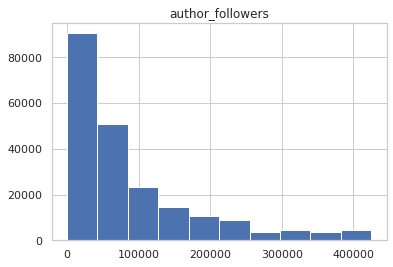

In [36]:
hist_author = tweets_data.query('author_followers < author_followers.quantile(.7)').hist(column=['author_followers'])

The objective of our project is to determine whether the bitcoin price goes up or down based on the tweets of the day before. Therefore it might be useful for us to keep only those tweets with the highest numbers (retweets, likes, quote count), as these tweets might have more impact on the bitcoin. 

First, we get all the unique dates that are on the dataset. 

In [39]:
a=[]
for i in range (len(tweets_data)):
    date=str(tweets_data.iloc[i][4])
    a.append(date[0:10])

x= np.unique(a)

In [40]:
len(x)

667

In [46]:
x[0]

'2020-01-02'

In [45]:
x[666]

'2021-10-31'

There are 667 unique dates from 2020-01-02 until 2021-10-31. 

There are almost 500 tweets per day, but as we said before we only want to keep the most popular. So we decided to keep the 10 most popular tweets per day. We are aware that only 10 tweets are not that much information, but the resources that we have access to are limited.

In [93]:
tweets_relevant = tweets_data.sort_values(by='retweets',ascending=False)

In [96]:
tweets_relevant.head(10)

,likes,author_id,author_tweets,retweets,created_at,text,author_location,quote_count,username,replies,author_followers,author_description,id
54505,538073,2455740283,5392,777852,2021-02-20 05:27:14+00:00,In 24 hours I’m going to give one random perso...,Follow me for a cookie,23926,MrBeast,51765,13507907,I want to make the world a better place before...,1362997215308906498
159290,864408,44196397,17112,107735,2021-03-24 07:02:40+00:00,You can now buy a Tesla with Bitcoin,None,23682,elonmusk,34727,77614776,,1374617643446063105
24451,78973,12,28278,75346,2020-10-14 21:05:25+00:00,Donate via #Bitcoin to help #EndSARS ���� http...,��,4937,jack,4472,6205528,#bitcoin,1316485283777519620
163514,491410,44196397,17112,73693,2021-05-12 22:06:14+00:00,Tesla &amp; Bitcoin https://t.co/YSswJmVZhP,None,50264,elonmusk,120365,77615261,,1392602041025843203
136409,78127,1445650784,3524,62497,2020-03-20 15:00:34+00:00,"We’re giving away $100,000 this #CashAppFriday...",None,181047,CashApp,134811,1724497,"Everything you can do with cash, you can do be...",1241016789758246914
165522,320005,44196397,17112,36664,2021-05-24 19:42:36+00:00,Spoke with North American Bitcoin miners. They...,None,11223,elonmusk,26015,77614977,,1396914548167233537
160082,36151,1445650784,3524,33839,2021-03-17 16:01:20+00:00,You can now instantly send bitcoin to other $c...,None,76322,CashApp,40382,1724469,"Everything you can do with cash, you can do be...",1372216492352241667
70507,96098,18918415,46015,31224,2021-04-15 00:05:11+00:00,Difficult to quantify what an ecological disas...,"Seattle, WA",2661,koush,718,53485,indie app person,1382485115817758720
114605,122850,2455740283,5393,24674,2021-09-02 20:34:13+00:00,I’m teaming up with @coinbase to give 1 person...,Follow me for a cookie,8912,MrBeast,172796,13513588,I want to make the world a better place before...,1433528712952229890
146022,19313,1445650784,3524,22062,2020-12-29 18:27:23+00:00,We’re giving out a big pile of bitcoin through...,None,16131,CashApp,35726,1724453,"Everything you can do with cash, you can do be...",1343986992472846337


Here we can see that 3 out of 10 of the most popular tweets are from Elon Musk, MrBeast (a popular Youtuber), and CashApp. The most popular tweet from Elon Musk was '*You can now buy a Tesla with Bitcoin*' on March 24th, 2021, with more than 100,000 retweets. 

In [97]:
x= pd.Series(x)

In [98]:
%time
aux=np.zeros(len(x))
tweets_final_2=[]
n=10
for i in range (len(tweets_relevant)):
                date=str(tweets_relevant.iloc[i][4])
                a=date[0:10]
                if(i%30000==0):
                    print(i)
                if (sum(x==a)==1 and aux[x[x==a].index[0]]<n and sum(aux)<len(x)*n):
                    #print(tweets_relevant.iloc[i])
                    tweets_final_2.append(tweets_relevant.iloc[i])
                    aux[x[x==a].index[0]]+=1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs
0
30000
60000
90000
120000
150000
180000
210000
240000
270000
300000


In [102]:
len(tweets_final_2)

6670

In [103]:
tweets_final_2=pd.DataFrame(tweets_final_2)

In [104]:
tweets_final_2=tweets_final_2.sort_values(by='created_at',ascending=True)

In [105]:
tweets_final_2.head(10)

,likes,author_id,author_tweets,retweets,created_at,text,author_location,quote_count,username,replies,author_followers,author_description,id
185910,358,339061487,63222,61,2020-01-02 01:24:26+00:00,The team at @TheRealBlockFi is coming out firi...,Global,15,APompliano,37,1535285,"I invest in early stage companies, own #bitcoi...",1212545148644679680
185914,471,339061487,63222,76,2020-01-02 02:59:05+00:00,Winners on Wall Street usually establish an in...,Global,6,APompliano,37,1535285,"I invest in early stage companies, own #bitcoi...",1212568971054067712
48,1810,17674486,33071,253,2020-01-02 03:03:35+00:00,"With gains of more than 9,000,000% since July ...",Moon Kingdom,21,MichellePhan,59,833424,#bitcoin,1212570100743589888
52,312,1413027896,23903,94,2020-01-02 13:43:36+00:00,2019 Crypto Returns\nChainlink: +506%\nTezos: ...,Join free newsletter here...,4,charliebilello,10,371360,Founder and CEO of Compound Capital Advisors. ...,1212731166568189952
9,2277,2438831503,22224,1701,2020-01-02 15:02:43+00:00,"Paul Pelosi Jr.'s Russia Ties, charges of taki...","Washington, DC ��������",251,ChanelRion,156,433486,@OANN Chief White House Correspondent | https:...,1212751077474492416
185916,1254,339061487,63222,263,2020-01-02 15:06:40+00:00,Bitcoin did $673 billion in adjusted on-chain ...,Global,7,APompliano,69,1535285,"I invest in early stage companies, own #bitcoi...",1212752072791203843
211050,295,23618940,35012,70,2020-01-02 15:23:15+00:00,2019 was a relatively quiet year for Bitcoin -...,Cyberspace,9,lopp,15,388374,Cypherpunk · Co-founder & CTO @CasaHODL · @BTC...,1212756246157287429
232158,146,19546277,305812,45,2020-01-02 17:40:03+00:00,Highlight: “The understanding of digital money...,"New York, NY",5,YahooFinance,15,1333043,The world’s biggest business news platform: ht...,1212790672018722816
23,168,1469101279,30944,45,2020-01-02 17:41:04+00:00,Tomorrow is the 11th anniversary of the Bitcoi...,57 countries and counting,0,aantonop,2,715105,"#Bitcoin & Open Blockchains, since 2012. \n\nA...",1212790928588595202
134859,97,928759224599040001,9636,50,2020-01-02 18:49:22+00:00,Bitcoin is not off to a great start in 2020 ht...,None,12,crypto,21,850123,A look at how cryptocurrencies and blockchain ...,1212808116527665152


In [106]:
tweets_final_2.describe()

,likes,author_id,author_tweets,retweets,quote_count,replies,author_followers,id
count,6670.000000,6.670000e+03,6.670000e+03,6670.000000,6670.000000,6670.000000,6.670000e+03,6.670000e+03
mean,4883.712444,1.428550e+17,4.627821e+04,940.995502,201.467166,509.922039,2.282220e+06,1.333718e+18
std,17025.948627,3.348284e+17,9.548943e+04,9845.222846,2757.405559,4161.732778,5.678861e+06,7.009016e+16
min,21.000000,1.200000e+01,3.500000e+01,16.000000,0.000000,0.000000,3.549000e+03,1.212545e+18
25%,475.000000,5.564303e+07,7.778000e+03,119.000000,12.000000,42.000000,4.675625e+05,1.272981e+18
50%,2010.000000,3.114302e+08,2.104400e+04,380.000000,36.000000,143.000000,1.276208e+06,1.333420e+18
75%,5320.750000,1.598709e+09,6.322300e+04,851.750000,89.000000,344.000000,2.262378e+06,1.394558e+18
max,864408.000000,1.387498e+18,1.237849e+06,777852.000000,181047.000000,175028.000000,7.763731e+07,1.454901e+18


In [107]:
tweets_final_2['username'].nunique()

702

So we only kept 6670 tweets, which means we have 10 tweets per day. Now the mean of retweets goes up to 940 retweets with a median of 380. There are still outliers that affect the mean, but we expect these are the ones that affect the most the prediction. On the other hand, there are only 702 unique users.

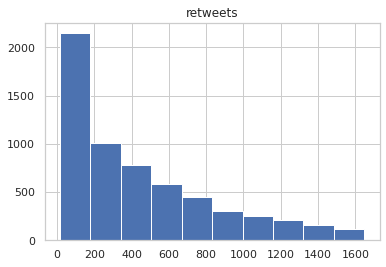

In [108]:
hist_retweets = tweets_final_2.query('retweets < retweets.quantile(.9)').hist(column=['retweets'])

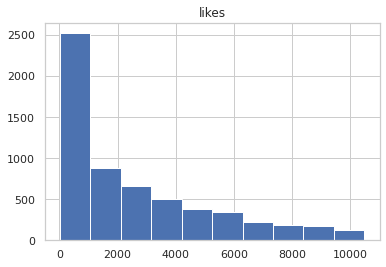

In [109]:
hist_likes = tweets_final_2.query('likes < likes.quantile(.9)').hist(column=['likes'])

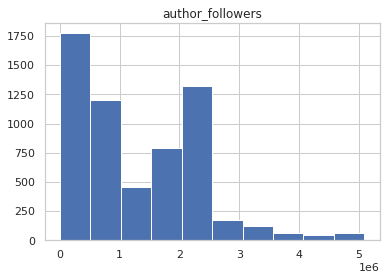

In [111]:
hist_author = tweets_final_2.query('author_followers < author_followers.quantile(.9)').hist(column=['author_followers'])

## Sentiment Analysis

Now we are going to use the Google API for sentiment analysis to analyze the tweets. We are going to get the score whether is positive 1, negative -1, or neutral 0; as well as the magnitude of the sentiment that can go from 0 to inf. Then we are going to create a variable for each day that shows the mean of the score and the magnitude. 

In [112]:
from google.cloud import language

In [113]:
def analyze_text_sentiment(text):
    client = language.LanguageServiceClient()
    document = language.Document(content=text, type_=language.Document.Type.PLAIN_TEXT)

    response = client.analyze_sentiment(document=document)

    sentiment = response.document_sentiment
    results = dict(
        text=text,
        score=sentiment.score,
        magnitude=sentiment.magnitude,
    )
    return (results)

In [114]:
score=[]
magnitude=[]
for i in range (0, 600):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])
    

There is a limit using the NLP Google API that only allows us to do 600 requests per minute, therefore we have to request per 600 tweets

In [117]:
for i in range (600, 1200):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [118]:
for i in range (1200, 1800):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [119]:
for i in range (1800, 2400):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [120]:
for i in range (2400, 3000):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [121]:
for i in range (3000, 3600):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [122]:
for i in range (3600, 4200):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [123]:
for i in range (4200, 4800):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [124]:
for i in range (4800, 5400):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [125]:
for i in range (5400, 6000):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [126]:
for i in range (6000, 6670):
    analysis=analyze_text_sentiment(tweets_final_2.iloc[i][5])
    score.append(analysis['score'])
    magnitude.append(analysis['magnitude'])

In [127]:
len(score)

6670

In [128]:
tweets_final_2['Score']= score
tweets_final_2['Magnitude']= magnitude
tweets_final_2.head(10)

,likes,author_id,author_tweets,retweets,created_at,text,author_location,quote_count,username,replies,author_followers,author_description,id,Score,Magnitude
185910,358,339061487,63222,61,2020-01-02 01:24:26+00:00,The team at @TheRealBlockFi is coming out firi...,Global,15,APompliano,37,1535285,"I invest in early stage companies, own #bitcoi...",1212545148644679680,-0.1,1.2
185914,471,339061487,63222,76,2020-01-02 02:59:05+00:00,Winners on Wall Street usually establish an in...,Global,6,APompliano,37,1535285,"I invest in early stage companies, own #bitcoi...",1212568971054067712,0.0,0.7
48,1810,17674486,33071,253,2020-01-02 03:03:35+00:00,"With gains of more than 9,000,000% since July ...",Moon Kingdom,21,MichellePhan,59,833424,#bitcoin,1212570100743589888,0.3,1.1
52,312,1413027896,23903,94,2020-01-02 13:43:36+00:00,2019 Crypto Returns\nChainlink: +506%\nTezos: ...,Join free newsletter here...,4,charliebilello,10,371360,Founder and CEO of Compound Capital Advisors. ...,1212731166568189952,0.2,0.2
9,2277,2438831503,22224,1701,2020-01-02 15:02:43+00:00,"Paul Pelosi Jr.'s Russia Ties, charges of taki...","Washington, DC ��������",251,ChanelRion,156,433486,@OANN Chief White House Correspondent | https:...,1212751077474492416,-0.2,2.0
185916,1254,339061487,63222,263,2020-01-02 15:06:40+00:00,Bitcoin did $673 billion in adjusted on-chain ...,Global,7,APompliano,69,1535285,"I invest in early stage companies, own #bitcoi...",1212752072791203843,0.0,0.1
211050,295,23618940,35012,70,2020-01-02 15:23:15+00:00,2019 was a relatively quiet year for Bitcoin -...,Cyberspace,9,lopp,15,388374,Cypherpunk · Co-founder & CTO @CasaHODL · @BTC...,1212756246157287429,0.4,0.9
232158,146,19546277,305812,45,2020-01-02 17:40:03+00:00,Highlight: “The understanding of digital money...,"New York, NY",5,YahooFinance,15,1333043,The world’s biggest business news platform: ht...,1212790672018722816,0.0,0.3
23,168,1469101279,30944,45,2020-01-02 17:41:04+00:00,Tomorrow is the 11th anniversary of the Bitcoi...,57 countries and counting,0,aantonop,2,715105,"#Bitcoin & Open Blockchains, since 2012. \n\nA...",1212790928588595202,0.0,0.6
134859,97,928759224599040001,9636,50,2020-01-02 18:49:22+00:00,Bitcoin is not off to a great start in 2020 ht...,None,12,crypto,21,850123,A look at how cryptocurrencies and blockchain ...,1212808116527665152,-0.6,0.6


We created two columns, one to store the score and the other for the magnitude. This data frame was stored as '**top_tweets.csv**'

In [130]:
score_magnitude = tweets_final_2.groupby(np.arange(len(tweets_final_2))//10).mean()
mean_day_score=score_magnitude['Score']
mean_day_magnitude=score_magnitude['Magnitude']

In [131]:
Mean_scores = pd.DataFrame(x, columns=['Date'])
Mean_scores['Mean Score']=mean_day_score
Mean_scores['Mean Magnitude']=mean_day_magnitude
Mean_scores

,Date,Mean Score,Mean Magnitude
0,2020-01-02,-7.450581e-10,0.77
1,2020-01-03,2.200000e-01,1.57
2,2020-01-04,1.000000e-01,1.12
3,2020-01-05,2.980232e-09,0.87
4,2020-01-06,-9.999999e-03,0.56
...,...,...,...
662,2021-10-27,1.300000e-01,0.71
663,2021-10-28,-5.000000e-02,0.71
664,2021-10-29,1.300000e-01,0.54
665,2021-10-30,-6.000000e-02,0.92


Mean_scores contains the mean score and magnitude of the tweets of each day. It was stored as '**day_scores.csv**'

# Exploratory Data Analysis and Feature Engineering: Yahoo Finance Data

In [47]:
import yfinance as yf
import pandas as pd
from datetime import datetime
import json
from google.cloud import storage
import yaml

## First look of our Data:

[*********************100%***********************]  1 of 1 completed
Number of registers: 2761


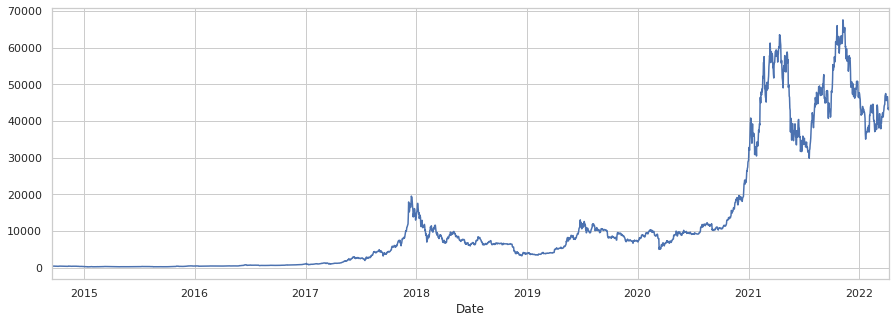

In [52]:
start = datetime(2013,1,1)
end = datetime.now().date().isoformat()
symbol = 'BTC-USD'

df = yf.download(symbol, start=start, end = end)
#df.to_csv('bitcoin_prueba.csv')

df['Adj Close'].plot(figsize=(15,5))
print('Number of registers:', len(df))

In [56]:
df = pd.read_csv('./data/bitcoin_prueba.csv')


# Preparation of data for ML

We only have tweets from January 2020 to october 2021. So, we will select the pricees of bitcoin of those dates for traning the model.

In [57]:
# Filter Rows by Dates in pandas DataFrame 
df2 = df[(df['Date'] >= "2020-01-01") & (df['Date'] < "2021-11-02")]
df3 = df[(df['Date'] >= "2019-12-31") & (df['Date'] < "2021-11-02")]
df2.head(2)
#print(df2.tail(1))

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1932,1932,2020-01-01,7194.89209,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
1933,1933,2020-01-02,7202.55127,7212.155273,6935.270020,6985.470215,6985.470215,20802083465


In [58]:
df3.head(2)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
1931,1931,2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
1932,1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997


Now we have two data frames:
* df2: with the dates of interest
* df3: with one prior extra day form the dates of interes

We will drop the last day of df3 and compare the *opening* of df3 (prior day) with the *opening* of df2 (new day). The comparation will be the difference of new_day minus prior_day. If the difference is positive that means that there was an increment in the value of bitcoin, otherwise ther was a decrease. 

We will make an indicator *'up_down'* that will take a value of 1 if there was an increase and 0 otherwise.

In [59]:
df_open_prior=df3['Open']
df_open_new_day=df2['Open']

#convert to list to make manipulations easier
prior=df_open_prior.tolist()
new_day=df_open_new_day.tolist()

#drop the last day of prior to make lists of same size
prior = prior[:-1]

len(new_day) == len(prior)

True

Now we compare and generate the indicator 'up_down'

In [60]:
#Now we compare and generate the index
up_down = []
for i in range(len(prior)):
    delta = new_day[i]-prior[i]
    if delta < 0:
        up_down.append(0)
    else:
        up_down.append(1)

Now we will add this label to the data frame of the days of interest (df2).

In [61]:
import warnings
warnings.filterwarnings('ignore')

df2['up_down'] = up_down
df2.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,up_down
1932,1932,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,0
1933,1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,1
1934,1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0
1935,1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1
1936,1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,1


Now we will save this data.

In [66]:
df2.to_csv('model_data.csv')

# Adding scores and bitcoin price

In [138]:
bitcoin= pd.read_csv('./data/model_data.csv')

In [139]:
bitcoin = bitcoin.iloc[1:-1 , :]

In [140]:
bitcoin

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,up_down
1,1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,1
2,1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0
3,1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1
4,1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,1
5,1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,1
...,...,...,...,...,...,...,...,...,...
665,2597,2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893,0
666,2598,2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247,0
667,2599,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767,1
668,2600,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616,1


In [142]:
len(Mean_scores)

667

It seems that we don't have the same number of data on both sides. We need to find which dates are missing

In [145]:
bitcoin.iloc[383][1]

'2021-01-19'

In [144]:
x[384]

'2021-01-22'

It appears that we don't have tweets from 2021-01-20 to 2021-01-20 so we are going to drop that bitcoin data from those days. 

In [146]:
bitcoin=bitcoin.drop(385)
bitcoin=bitcoin.drop(386)

In [147]:
bitcoin.iloc[384][1]

'2021-01-22'

In [148]:
x[384]

'2021-01-22'

We can now join the data scores from the tweets to the bitcoin price. 

In [149]:
bitcoin.reset_index(inplace=True)
bitcoin['Mean Score']=mean_day_score
bitcoin['Mean Magnitude']=mean_day_magnitude
bitcoin

,index,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,up_down,Mean Score,Mean Magnitude
0,1,1933,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,1,-7.450581e-10,0.77
1,2,1934,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0,2.200000e-01,1.57
2,3,1935,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1,1.000000e-01,1.12
3,4,1936,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,1,2.980232e-09,0.87
4,5,1937,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,1,-9.999999e-03,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...
662,665,2597,2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893,0,1.300000e-01,0.71
663,666,2598,2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247,0,-5.000000e-02,0.71
664,667,2599,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767,1,1.300000e-01,0.54
665,668,2600,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616,1,-6.000000e-02,0.92


In [150]:
historical=bitcoin.iloc[:, 2:]
historical

,Date,Open,High,Low,Close,Adj Close,Volume,up_down,Mean Score,Mean Magnitude
0,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,1,-7.450581e-10,0.77
1,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0,2.200000e-01,1.57
2,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1,1.000000e-01,1.12
3,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,1,2.980232e-09,0.87
4,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,23276261598,1,-9.999999e-03,0.56
...,...,...,...,...,...,...,...,...,...,...
662,2021-10-27,60352.000000,61435.183594,58208.187500,58482.386719,58482.386719,43657076893,0,1.300000e-01,0.71
663,2021-10-28,58470.730469,62128.632812,58206.917969,60622.136719,60622.136719,45257083247,0,-5.000000e-02,0.71
664,2021-10-29,60624.871094,62927.609375,60329.964844,62227.964844,62227.964844,36856881767,1,1.300000e-01,0.54
665,2021-10-30,62239.363281,62330.144531,60918.386719,61888.832031,61888.832031,32157938616,1,-6.000000e-02,0.92


This data was stored as '**clean_model.csv**'

Now that we have our data prepared we will make a plot of *Open* vs *Mean Score* to try to find a relationship between the tiweeter opinion and the price of bitcoin. 

In [80]:
data_bitcoin = pd.read_csv('./data/clean_model.csv')
data_bitcoin.head(3)

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,up_down,Mean Score,Mean Magnitude
0,0,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,1,-7.450581e-10,0.77
1,1,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,0,2.200000e-01,1.57
2,2,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,1,1.000000e-01,1.12


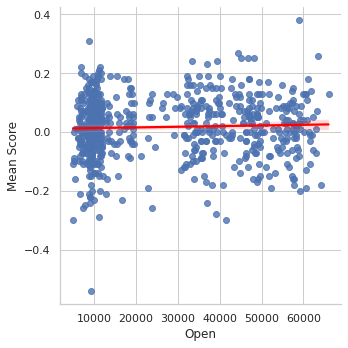

In [92]:
import seaborn as sns
sns.lmplot(y='Mean Score', x='Open',data=data_bitcoin,fit_reg=True, line_kws={'color': 'red'} )

On  first look it seems like the relation is almost none, but we can see a little positive slope.

# First models

Here we will explore the relationship between bitcoin price ups and downs and the score obtained from  the sentiment analysis of the  tweets from January 2020 to October 2021

In [132]:
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.tree import DecisionTreeRegressor # Arbol de Decisiones
from sklearn.linear_model import Lasso # Regresion Regularizada con Lasso
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


#grid serch
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score,log_loss


### Data labeling data for ML:


We are going to try to find what is the relationship between the rises and falls of the price of bitcoin, using as an explanatory variable the
people's confidence in the cryptocurrency (general people's confidence of people measured through sentiment analysis score). We use a linear regression, taking as our variable to predict whether the price of bitcoin went up or down and as an explanatory variable the sentiment analysis score.

In [70]:
X=data_bitcoin.iloc[:, 9:11]
Y=data_bitcoin['up_down']

Spliting training, validation and testing:

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"{len(x_train)} training samples")
print(f"{len(x_test)} test samples")

533 training samples
134 test samples


### First simple model: Logistic Regression

As our task is a classification problem we will beging by the simpliest model of binary classification with a logistic regresion.

In [72]:
model_1 = sklearn.linear_model.LogisticRegression() #creating the model

model_1.fit(x_train, y_train) #fiting the data to the model

LogisticRegression()

Now we evaluate the accuracy of our model:

In [73]:
score = model_1.score(x_test, y_test)
print(score)

0.4925373134328358


### Second model: Logistic Regression with regularization

In [74]:
# Grid search over Lasso Regularized Linear Regression

model_2 = sklearn.linear_model.LogisticRegression(C=1, penalty='elasticnet', solver='saga', l1_ratio=0.9,random_state=27,max_iter=1000000) #creating the model
model_2.fit(x_train, y_train) #fiting the data to the model


LogisticRegression(C=1, l1_ratio=0.9, max_iter=1000000, penalty='elasticnet',
                   random_state=27, solver='saga')

In [75]:
score2 = model_2.score(x_test, y_test)
print(score2)

0.4925373134328358


We thought that using regularization, our model would perform better, but because we are using only a few variables to predict the ups and downs of the price, the regularization was not really helpful. 

### Third model: multiple choice model

We wanted to explore different models simultaneously, so we tried with Voting Classifier, Gradient Boosting Classifier and Random Forest Classifier and compared them according to theit precision:

In [77]:
GBC=GradientBoostingClassifier(n_estimators=1000, learning_rate=1,
                               max_depth=1,random_state=27)
RFC = RandomForestClassifier(n_estimators=1000, min_samples_split=2)
clf=VotingClassifier([
    ("GBC",GBC),
    ('RFC', RFC)
],voting="soft")

In [79]:
print ("----Accuracy----")
models= clf,GBC, RFC
spacing=max([len(models.__class__.__name__) for model in models])+4
for model in models:
    model.fit(x_train,y_train)
    model_score=model.score(x_test, y_test)
    model_name=model.__class__.__name__
    len_model_name=len(model_name)
    print(f"{model_name}:{model_score:>{spacing - len_model_name}.2f}")

----Accuracy----
VotingClassifier:   0.54
GradientBoostingClassifier:             0.56
RandomForestClassifier:         0.60


The best model, according to the third model: our final conclussion about these models is that we might train our data with Random Forest Classifier, which had the best precision aproximada de 0.60

### Future improvements:

As we improve our next deliverable, we have the task of collecting more tweets from previous years in order to better train our models, that is, with more and more robust information.


## References:

* [Sklearn linear regresion](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
* [Sentiment Analysis Tutorial Google](https://cloud.google.com/natural-language/docs/sentiment-tutorial)